In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap


In [2]:
df = pd.read_csv("NYPD_Shooting.csv")

In [3]:
df.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,201575314,08/23/2019,22:10:00,QUEENS,103,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,1037451,193561,40.697805,-73.808141,POINT (-73.80814071699996 40.697805308000056)
1,205748546,11/27/2019,15:54:00,BRONX,40,0.0,NaN,False,<18,M,BLACK,25-44,F,BLACK,1006789,237559,40.818700,-73.918571,POINT (-73.91857061799993 40.81869973000005)
2,193118596,02/02/2019,19:40:00,MANHATTAN,23,0.0,NaN,False,18-24,M,WHITE HISPANIC,18-24,M,BLACK HISPANIC,999347,227795,40.791916,-73.945480,POINT (-73.94547965999999 40.791916091000076)
3,204192600,10/24/2019,00:52:00,STATEN ISLAND,121,0.0,PVT HOUSE,True,25-44,M,BLACK,25-44,F,BLACK,938149,171781,40.638064,-74.166108,POINT (-74.16610830199996 40.63806398200006)
4,201483468,08/22/2019,18:03:00,BRONX,46,0.0,NaN,False,25-44,M,BLACK HISPANIC,18-24,M,BLACK,1008224,250621,40.854547,-73.913339,POINT (-73.91333944399999 40.85454734900003)


In [4]:
df.shape

(21626, 19)

In [5]:
df.drop(columns = ["X_COORD_CD", "Y_COORD_CD", "Lon_Lat"], inplace=True)

In [6]:
df.isna().mean()

INCIDENT_KEY               0.000000
OCCUR_DATE                 0.000000
OCCUR_TIME                 0.000000
BORO                       0.000000
PRECINCT                   0.000000
JURISDICTION_CODE          0.000092
LOCATION_DESC              0.571581
STATISTICAL_MURDER_FLAG    0.000000
PERP_AGE_GROUP             0.337788
PERP_SEX                   0.336216
PERP_RACE                  0.336216
VIC_AGE_GROUP              0.000000
VIC_SEX                    0.000000
VIC_RACE                   0.000000
Latitude                   0.000000
Longitude                  0.000000
dtype: float64

Considering that I have over 20k rows I decide to drop all the NA...enough rows will still be available

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(6564, 16)

In [9]:
df.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,Latitude,Longitude
3,204192600,10/24/2019,00:52:00,STATEN ISLAND,121,0.0,PVT HOUSE,True,25-44,M,BLACK,25-44,F,BLACK,40.638064,-74.166108
8,193694863,02/17/2019,03:00:00,QUEENS,114,2.0,MULTI DWELL - PUBLIC HOUS,False,18-24,M,BLACK,25-44,M,BLACK,40.756275,-73.945014
14,201436772,08/21/2019,23:34:00,STATEN ISLAND,120,0.0,GROCERY/BODEGA,False,<18,M,WHITE HISPANIC,<18,M,WHITE HISPANIC,40.634411,-74.118962
25,201852654,08/31/2019,07:42:00,BRONX,45,0.0,GAS STATION,False,18-24,M,BLACK HISPANIC,25-44,M,WHITE HISPANIC,40.842625,-73.852058
34,193939359,02/24/2019,23:20:00,BRONX,44,2.0,MULTI DWELL - PUBLIC HOUS,False,18-24,M,BLACK,25-44,M,BLACK,40.830212,-73.911821


In [10]:
df.dtypes

INCIDENT_KEY                 int64
OCCUR_DATE                  object
OCCUR_TIME                  object
BORO                        object
PRECINCT                     int64
JURISDICTION_CODE          float64
LOCATION_DESC               object
STATISTICAL_MURDER_FLAG       bool
PERP_AGE_GROUP              object
PERP_SEX                    object
PERP_RACE                   object
VIC_AGE_GROUP               object
VIC_SEX                     object
VIC_RACE                    object
Latitude                   float64
Longitude                  float64
dtype: object

I want to covert the occur date and occur time variables to a datetime so that I can extract more information (day, month, year and so on)

In [11]:
df.OCCUR_DATE = pd.to_datetime(df.OCCUR_DATE)

In [12]:
df.OCCUR_TIME = pd.to_datetime(df.OCCUR_TIME)

In [13]:
df["Year"] = df.OCCUR_DATE.dt.year

In [14]:
df["Month"] = df.OCCUR_DATE.dt.month

In [15]:
df["Day"] = df.OCCUR_DATE.dt.day

In [16]:
df["Hour"] = df.OCCUR_TIME.dt.hour

In [17]:
df["Minute"] = df.OCCUR_TIME.dt.minute

In [18]:
df.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,...,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,Latitude,Longitude,Year,Month,Day,Hour,Minute
3,204192600,2019-10-24,2021-02-18 00:52:00,STATEN ISLAND,121,0.0,PVT HOUSE,True,25-44,M,...,25-44,F,BLACK,40.638064,-74.166108,2019,10,24,0,52
8,193694863,2019-02-17,2021-02-18 03:00:00,QUEENS,114,2.0,MULTI DWELL - PUBLIC HOUS,False,18-24,M,...,25-44,M,BLACK,40.756275,-73.945014,2019,2,17,3,0
14,201436772,2019-08-21,2021-02-18 23:34:00,STATEN ISLAND,120,0.0,GROCERY/BODEGA,False,<18,M,...,<18,M,WHITE HISPANIC,40.634411,-74.118962,2019,8,21,23,34
25,201852654,2019-08-31,2021-02-18 07:42:00,BRONX,45,0.0,GAS STATION,False,18-24,M,...,25-44,M,WHITE HISPANIC,40.842625,-73.852058,2019,8,31,7,42
34,193939359,2019-02-24,2021-02-18 23:20:00,BRONX,44,2.0,MULTI DWELL - PUBLIC HOUS,False,18-24,M,...,25-44,M,BLACK,40.830212,-73.911821,2019,2,24,23,20


In [19]:
df.BORO.value_counts()

BROOKLYN         2616
BRONX            1830
QUEENS            953
MANHATTAN         925
STATEN ISLAND     240
Name: BORO, dtype: int64

Number of shootings by neighbourhood

In [20]:
df.BORO.value_counts(normalize=True)

BROOKLYN         0.398537
BRONX            0.278793
QUEENS           0.145186
MANHATTAN        0.140920
STATEN ISLAND    0.036563
Name: BORO, dtype: float64

% of shootings by neighbourhood

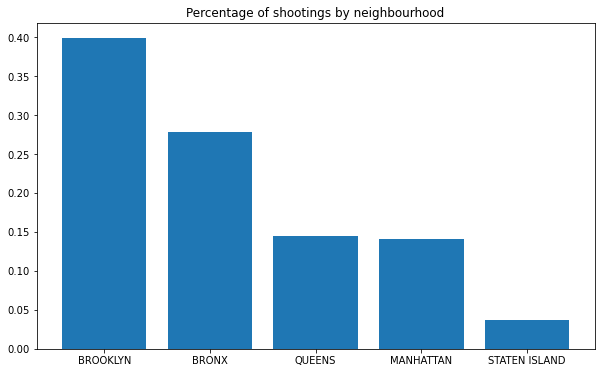

In [21]:
fig, ax = plt.subplots(figsize = (10,6))
_ = plt.bar(x = df.BORO.value_counts(normalize=True).index, height=df.BORO.value_counts(normalize=True).values)
_ = ax.set_title("Percentage of shootings by neighbourhood")


Let's get more informaton of the gender of the shooter

In [22]:
df.PERP_SEX.value_counts()

M    5804
U     594
F     166
Name: PERP_SEX, dtype: int64

shooters are mainly men

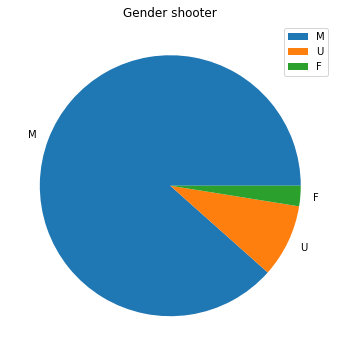

In [23]:
fig, ax = plt.subplots(figsize = (10,6))
_ = plt.pie(x = df.PERP_SEX.value_counts().values,labels= df.PERP_SEX.value_counts().index)
_ = ax.set_title("Gender shooter")
_ = ax.legend()

What about the age of the shooter?

In [24]:
df.PERP_AGE_GROUP.value_counts()

18-24      2350
25-44      2044
UNKNOWN    1373
<18         543
45-64       216
65+          35
940           1
224           1
1020          1
Name: PERP_AGE_GROUP, dtype: int64

I can see strange values (940,1020, 224...I record for each)...I will drop them from the dataset

In [25]:
df.loc[(df.PERP_AGE_GROUP == "940") | (df.PERP_AGE_GROUP == "1020") | (df.PERP_AGE_GROUP == "224")]

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,...,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,Latitude,Longitude,Year,Month,Day,Hour,Minute
1406,142247967,2015-04-19,2021-02-18 02:05:00,BRONX,47,2.0,MULTI DWELL - PUBLIC HOUS,False,1020,M,...,25-44,M,BLACK,40.883658,-73.847848,2015,4,19,2,5
2914,89595619,2013-03-12,2021-02-18 20:28:00,BROOKLYN,90,0.0,GAS STATION,False,940,M,...,25-44,M,WHITE HISPANIC,40.705268,-73.927344,2013,3,12,20,28
19668,71625599,2010-03-06,2021-02-18 04:14:00,BRONX,41,0.0,BAR/NIGHT CLUB,False,224,M,...,18-24,M,WHITE HISPANIC,40.812520,-73.902813,2010,3,6,4,14


In [26]:
df.drop(index = [1406,2914,19668], inplace=True )

I dropped the three rows of the PERP_AGE_GROUP variable containing wrong values

In [27]:
df.PERP_AGE_GROUP.value_counts(normalize=True)

18-24      0.358177
25-44      0.311538
UNKNOWN    0.209267
<18        0.082762
45-64      0.032922
65+        0.005335
Name: PERP_AGE_GROUP, dtype: float64

Now the age groups look fine...it looks like shooters are mainly young (43% are below 24)

What about the evolution of shootings over the years?

In [28]:
df.Year.value_counts().sort_index()

2006    976
2007    739
2008    805
2009    765
2010    634
2011    541
2012    434
2013    295
2014    283
2015    275
2016    227
2017    186
2018    214
2019    187
Name: Year, dtype: int64

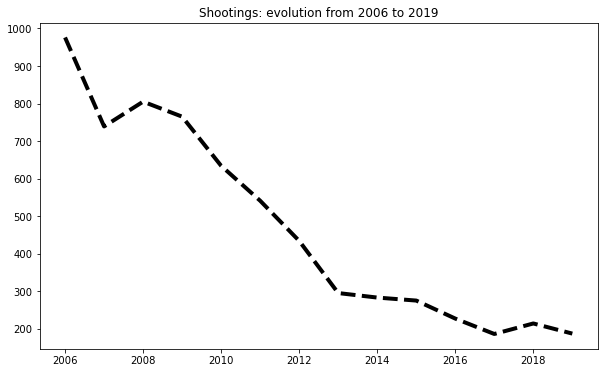

In [29]:
fig, ax = plt.subplots(figsize = (10,6))
_ = plt.plot(df.Year.value_counts().sort_index().index, df.Year.value_counts().sort_index().values, linestyle = "--", color = "black", linewidth = 4)
_ = ax.set_title("Shootings: evolution from 2006 to 2019")

It looks like the number of shootings has decreased over the years

What about the month in which they occur? Is there a month in which they are more frequent? (I WOULDN'T EXPECT A DIFFERENT BY MONTHS....maybe by hour)

In [30]:
df.Month.value_counts().sort_index()

1     562
2     380
3     508
4     549
5     596
6     605
7     648
8     662
9     576
10    550
11    470
12    455
Name: Month, dtype: int64

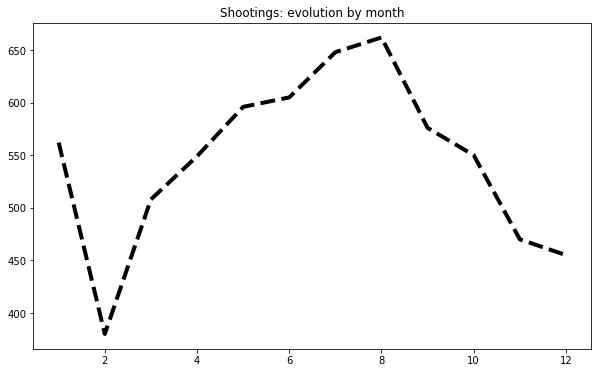

In [31]:
fig, ax = plt.subplots(figsize = (10,6))
_ = plt.plot(df.Month.value_counts().sort_index().index, df.Month.value_counts().sort_index().values, linestyle = "--", color = "black", linewidth = 4)
_ = ax.set_title("Shootings: evolution by month")

There seem to be some differences but looking at the range of the Y axis they are not huge differences

Now let's check shootings by hour (HERE I EXPECT SOME HOURS TO HAVE SIGNIFICANT HIGHER PROPORTIONS OF SHOOTINGS...for example night hours)

In [32]:
df.Hour.value_counts().sort_index()

0     444
1     486
2     409
3     442
4     351
5     175
6     108
7      68
8      59
9      73
10     89
11    124
12    140
13    157
14    247
15    253
16    271
17    283
18    306
19    343
20    354
21    459
22    447
23    473
Name: Hour, dtype: int64

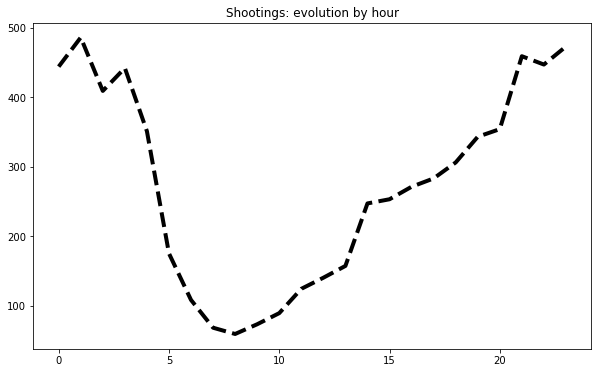

In [33]:
fig, ax = plt.subplots(figsize = (10,6))
_ = plt.plot(df.Hour.value_counts().sort_index().index, df.Hour.value_counts().sort_index().values, linestyle = "--", color = "black", linewidth = 4)
_ = ax.set_title("Shootings: evolution by hour")

As expected there are some hours with significantly higher proportions of shootings...In particular we can see that night hours have considerably higher number of shootings compared to day hours
The number of shootings is very high during the night then it decreases during the day and it increases again starting from the late evening 

Let's get more information about the victims

In [34]:
df.VIC_SEX.value_counts()

M    5739
F     820
U       2
Name: VIC_SEX, dtype: int64

The majority are male

In [35]:
df.VIC_AGE_GROUP.value_counts(normalize=True)

25-44      0.424630
18-24      0.377077
<18        0.110806
45-64      0.074226
65+        0.009145
UNKNOWN    0.004115
Name: VIC_AGE_GROUP, dtype: float64

90% of the victims are belowe 24

In [36]:
df.VIC_RACE.value_counts(normalize=True)

BLACK                             0.691968
WHITE HISPANIC                    0.156683
BLACK HISPANIC                    0.096022
WHITE                             0.034751
ASIAN / PACIFIC ISLANDER          0.015851
UNKNOWN                           0.004115
AMERICAN INDIAN/ALASKAN NATIVE    0.000610
Name: VIC_RACE, dtype: float64

Almost 70% of the victims are black

In [37]:
df.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,...,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,Latitude,Longitude,Year,Month,Day,Hour,Minute
3,204192600,2019-10-24,2021-02-18 00:52:00,STATEN ISLAND,121,0.0,PVT HOUSE,True,25-44,M,...,25-44,F,BLACK,40.638064,-74.166108,2019,10,24,0,52
8,193694863,2019-02-17,2021-02-18 03:00:00,QUEENS,114,2.0,MULTI DWELL - PUBLIC HOUS,False,18-24,M,...,25-44,M,BLACK,40.756275,-73.945014,2019,2,17,3,0
14,201436772,2019-08-21,2021-02-18 23:34:00,STATEN ISLAND,120,0.0,GROCERY/BODEGA,False,<18,M,...,<18,M,WHITE HISPANIC,40.634411,-74.118962,2019,8,21,23,34
25,201852654,2019-08-31,2021-02-18 07:42:00,BRONX,45,0.0,GAS STATION,False,18-24,M,...,25-44,M,WHITE HISPANIC,40.842625,-73.852058,2019,8,31,7,42
34,193939359,2019-02-24,2021-02-18 23:20:00,BRONX,44,2.0,MULTI DWELL - PUBLIC HOUS,False,18-24,M,...,25-44,M,BLACK,40.830212,-73.911821,2019,2,24,23,20


Let's have a look at the location where shootings happen

In [38]:
df.LOCATION_DESC.value_counts()

MULTI DWELL - PUBLIC HOUS    2506
MULTI DWELL - APT BUILD      1860
PVT HOUSE                     553
BAR/NIGHT CLUB                427
GROCERY/BODEGA                387
NONE                          147
COMMERCIAL BLDG               141
RESTAURANT/DINER              126
BEAUTY/NAIL SALON              74
FAST FOOD                      59
SOCIAL CLUB/POLICY LOCATI      34
GAS STATION                    31
LIQUOR STORE                   26
STORE UNCLASSIFIED             25
SMALL MERCHANT                 21
DRY CLEANER/LAUNDRY            19
HOSPITAL                       18
HOTEL/MOTEL                    18
SUPERMARKET                    17
JEWELRY STORE                  12
DRUG STORE                     10
CLOTHING BOUTIQUE               9
SHOE STORE                      8
VARIETY STORE                   8
TELECOMM. STORE                 5
FACTORY/WAREHOUSE               4
DEPT STORE                      3
CHAIN STORE                     3
CANDY STORE                     2
GYM/FITNESS FA

In [39]:
year_2019 = df.loc[df.Year == 2019]

In [40]:
map_newYork = folium.Map(location= [40.73, -73.93], zoom_start = 12)


In [41]:
heat_data = [[row['Latitude'],row['Longitude']] for index, row in year_2019.iterrows()]
HeatMap(heat_data).add_to(map_newYork)

In [42]:
map_newYork

The map allows us to see where shootings happened in 2019

In [43]:
map_newYork_allYears = folium.Map(location= [40.73, -73.93], zoom_start = 12)


In [44]:
heat_data_allYears = [[row['Latitude'],row['Longitude']] for index, row in df.iterrows()]
HeatMap(heat_data_allYears).add_to(map_newYork_allYears)

In [45]:
map_newYork_allYears

Map considering all the years